#### Importando as Bibliotecas e Carregando os dados

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [ ]:
#config_path = 'config/config.json'  # Caminho completo para o arquivo de configuração
with open('config/config.json', 'r') as config_file:
    config = json.load(config_file)

In [15]:
DB_USER = config['db_user']
DB_PASSWORD = config['db_password']
DB_NAME = config['db_name']
DB_HOST = config['db_host']

In [7]:
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}')

##### 1. Crie uma visualização que mostre a distribuição da duração dos alugueis dos filmes na base de dados.

In [16]:
query_duracao_alugueis = """
    SELECT
        rental_id,
        DATE_PART('day', return_date - rental_date) AS duracao_em_dias
    FROM
        rental
    WHERE
        return_date IS NOT NULL;
"""

df_duracao_alugueis = pd.read_sql_query(query_duracao_alugueis, engine)

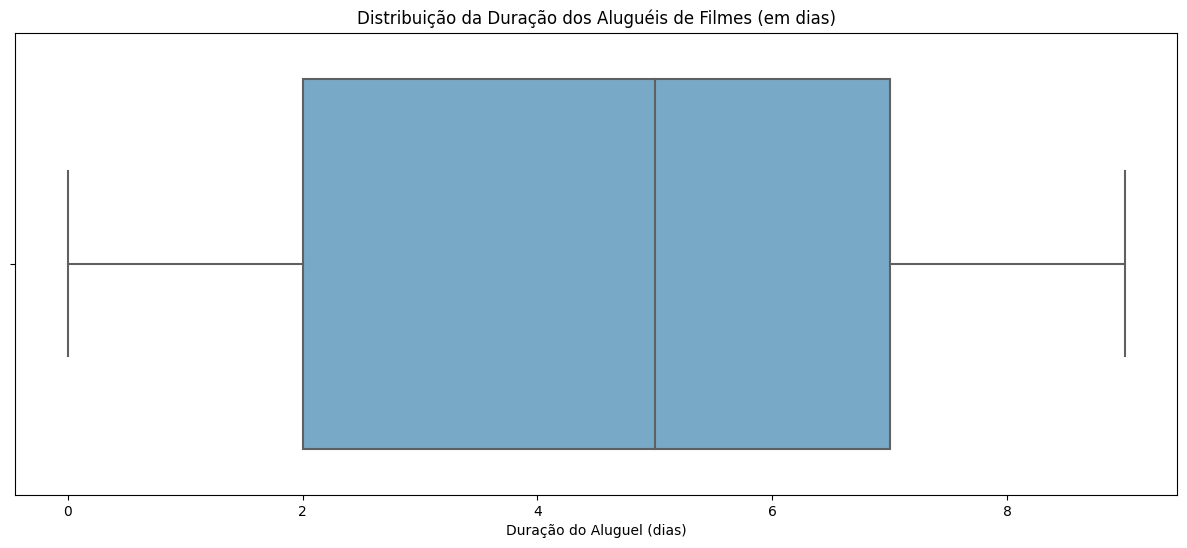

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_duracao_alugueis, x='duracao_em_dias', orient='h', palette='Blues')
plt.xlabel('Duração do Aluguel (dias)')
plt.title('Distribuição da Duração dos Aluguéis de Filmes (em dias)')
plt.show()

* Conclusão: As pessoas alugam entre 0 e 9 dias sendo o intervalo mais comum entre 2 e 7 com a mediana de 5 dias. 

#### 2. Realize uma análise de tendências mensais no número de aluguéis de filmes ao longo do tempo e apresente os resultados em um gráfico de linha.

In [18]:
query_tendencia_mensal = """
    SELECT
        DATE_TRUNC('month', rental_date) AS mes,
        COUNT(rental_id) AS total_alugueis
    FROM
        rental
    GROUP BY
        mes
    ORDER BY
        mes;
"""

df_tendencia_mensal = pd.read_sql_query(query_tendencia_mensal, engine)

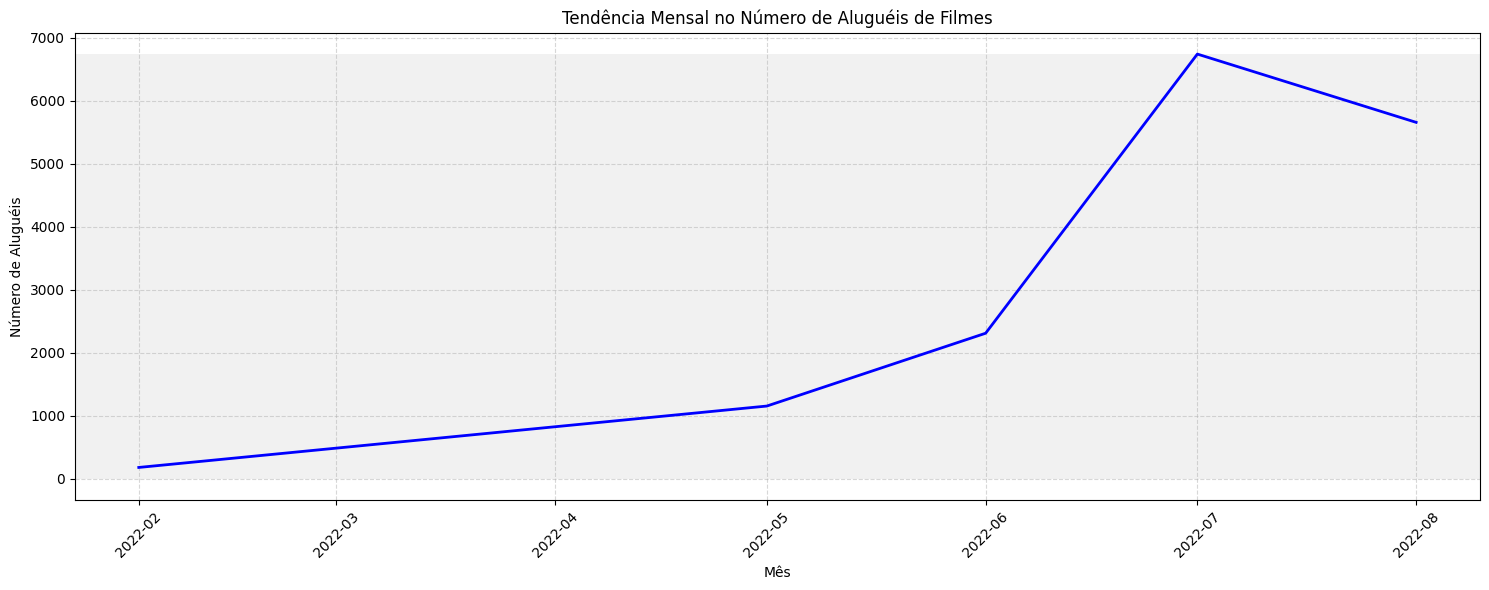

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(df_tendencia_mensal['mes'], df_tendencia_mensal['total_alugueis'], color='b', linewidth=2)
plt.xlabel('Mês')
plt.ylabel('Número de Aluguéis')
plt.title('Tendência Mensal no Número de Aluguéis de Filmes')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.axhspan(0, max(df_tendencia_mensal['total_alugueis']), facecolor='lightgray', alpha=0.3)
plt.show()

* Conclusão: Nossos registros começam em fevereiro de 2022 e vão até 22 de agosto de 2022, nesse período podemos notar que a locadora teve um crescimento bem grande principalmente do mês de junho para julho no qual o crescimento foi cerca de 300% e se mantendo no mês de agosto, a pequena queda que ocorreu de julho para agosto pode ser explicada pelos dias faltantes no mês 08. 